### Visualizations

The data can be found at https://www.census.gov/programs-surveys/acs/microdata/access/2019.html.
using: 

FTP: file transfer protocol (getting it fromthe internet to a data science environemnt)
SFTP (encripted, secured)

In [1]:
# import packages and functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import wget # wget will need to be installed use pip install wget
from zipfile import ZipFile
import plotnine
import warnings

In [27]:
# eliminate warnings
# https://www.geeksforgeeks.org/how-to-disable-python-warnings/#
import warnings

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [2]:
# reading in the data from the Census Bureau
# the file at the Census is a zipped file
# https://www.geeksforgeeks.org/working-zip-files-python/
# https://pythonguides.com/download-zip-file-from-url-using-python/
zfile = 'https://www2.census.gov/programs-surveys/acs/data/pums/2019/1-Year/csv_pfl.zip'
wget.download(zfile)
file_name = "csv_pfl.zip"
with ZipFile(file_name, 'r') as zip:
    zip.printdir()
    print('Extracting all the files now...')
    zip.extractall()
    print(' Done.')

-1 / unknownFile Name                                             Modified             Size
psam_p12.csv                                   2020-08-06 09:04:02    145196276
ACS2019_PUMS_README.pdf                        2020-10-01 13:10:04       220662
Extracting all the files now...
 Done.


In [3]:
# read the csv file into a pandas data frame
df = pd.read_csv('psam_p12.csv')
df.head()

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2019GQ0000016,5,1,8500,3,12,1010145,32,33,...,32,32,60,30,5,6,5,32,32,60
1,P,2019GQ0000017,5,1,1104,3,12,1010145,13,56,...,12,12,12,1,13,23,12,24,25,12
2,P,2019GQ0000030,5,1,5701,3,12,1010145,20,33,...,21,0,0,20,21,0,43,22,44,21
3,P,2019GQ0000040,5,1,101,3,12,1010145,45,19,...,47,87,45,89,48,45,7,47,47,48
4,P,2019GQ0000045,5,1,8620,3,12,1010145,48,48,...,51,47,48,50,90,0,50,48,50,1


In [6]:
# numeric mean of each numeric column using the .mean function 
print(df.mean(numeric_only=True))

DIVISION       5.000000
SPORDER        1.970895
PUMA        7126.471631
REGION         3.000000
ST            12.000000
               ...     
PWGTP76      104.619409
PWGTP77      104.619409
PWGTP78      104.619409
PWGTP79      104.619409
PWGTP80      104.619409
Length: 284, dtype: float64


In [7]:
len(df)

205294

In [8]:
df.dtypes

RT          object
SERIALNO    object
DIVISION     int64
SPORDER      int64
PUMA         int64
             ...  
PWGTP76      int64
PWGTP77      int64
PWGTP78      int64
PWGTP79      int64
PWGTP80      int64
Length: 288, dtype: object

In [9]:
# subset the data to just Gainesville observations
# https://www.census.gov/geographies/reference-maps/2010/geo/2010-pumas/florida.html
# Gainesville is PUMA 00101. This is a numeric, so drop the leading zeros.
gville = df[df["PUMA"]==101]
gville.head()

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
3,P,2019GQ0000040,5,1,101,3,12,1010145,45,19,...,47,87,45,89,48,45,7,47,47,48
9,P,2019GQ0000099,5,1,101,3,12,1010145,60,24,...,120,1,0,58,57,60,62,119,1,124
31,P,2019GQ0000488,5,1,101,3,12,1010145,58,26,...,9,109,59,57,107,56,57,106,58,57
78,P,2019GQ0001599,5,1,101,3,12,1010145,83,21,...,84,82,12,83,150,13,86,13,83,13
119,P,2019GQ0002119,5,1,101,3,12,1010145,24,19,...,25,3,24,44,25,44,46,3,25,23


In [10]:
gville.shape

(1448, 288)

In [11]:
# count the unique categories in a data frame in python
# the CIT variable represents the citizenship categories of the PUMS Person Survey
# read the data dictionary for variable information
# https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2019.pdf
# https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/
gville['CIT'].value_counts().sort_values(ascending=False)

CIT
1    1222
5      95
4      82
3      27
2      22
Name: count, dtype: int64

In [12]:
# change the result into a series
cit = gville['CIT'].value_counts().sort_values(ascending=False)
cit

CIT
1    1222
5      95
4      82
3      27
2      22
Name: count, dtype: int64

In [13]:
ser = pd.Series(cit)
print(ser)

CIT
1    1222
5      95
4      82
3      27
2      22
Name: count, dtype: int64


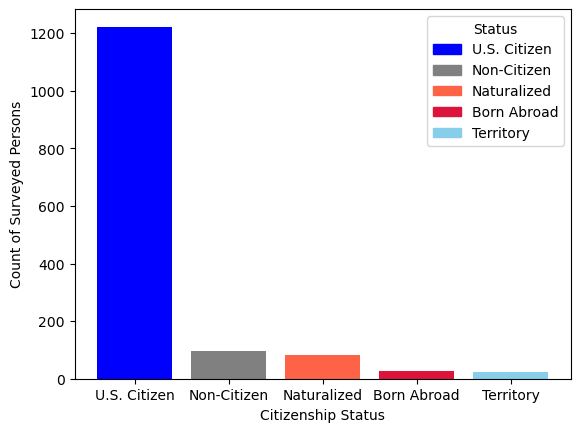

In [14]:
# this is a single categorical variable
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py
fig, ax = plt.subplots()

citizenship = ['U.S. Citizen', 'Non-Citizen', 'Naturalized', 'Born Abroad', 'Territory']
counts = cit
bar_colors = ['blue', 'grey', 'tomato', 'crimson', "skyblue"]

ax.bar(citizenship, counts, label=citizenship, color=bar_colors)

ax.set_ylabel('Count of Surveyed Persons')
ax.set_xlabel('Citizenship Status')

# build the legend using 'proxy artists'
# https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html#proxy-legend-handles
blue_patch = mpatches.Patch(color='blue', label='U.S. Citizen')
grey_patch = mpatches.Patch(color='grey', label='Non-Citizen')
tomato_patch = mpatches.Patch(color='tomato', label='Naturalized')
crimson_patch = mpatches.Patch(color='crimson', label='Born Abroad')
skyblue_patch = mpatches.Patch(color='skyblue', label='Territory')
plt.legend(handles=[blue_patch, grey_patch, tomato_patch, crimson_patch, skyblue_patch], title='Status')

plt.show()

In [15]:
# convert the CIT series into a dataframe while converting the existing CIT label into a column
cit = cit.rename_axis('cit').reset_index()

In [16]:
# calculate the percentages for each CIT code
# https://www.geeksforgeeks.org/how-to-calculate-the-percentage-of-a-column-in-pandas/
cit['percent'] = round(((cit['count']/cit['count'].sum())*100),2)
cit

,cit,count,percent
0,1,1222,84.39
1,5,95,6.56
2,4,82,5.66
3,3,27,1.86
4,2,22,1.52


In [17]:
cit['status'] = ['U.S. Citizen', 'Non-Citizen', 'Naturalized', 'Born Abroad', 'U.S. Territory']
cit

,cit,count,percent,status
0,1,1222,84.39,U.S. Citizen
1,5,95,6.56,Non-Citizen
2,4,82,5.66,Naturalized
3,3,27,1.86,Born Abroad
4,2,22,1.52,U.S. Territory


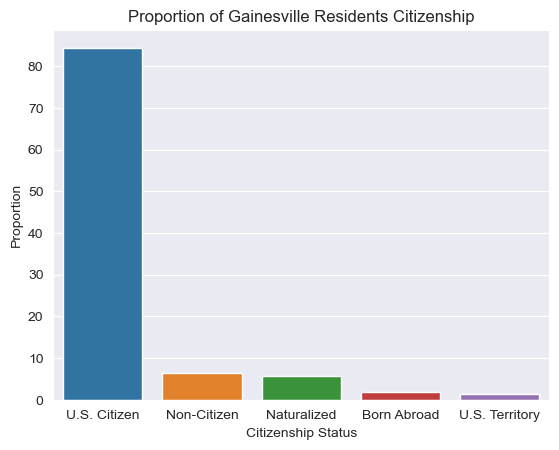

In [18]:
sns.set_style("darkgrid")
sns.barplot(x='status',
            y= 'percent',
            #hue='status',
            data=cit)
plt.xlabel("Citizenship Status")
plt.ylabel("Proportion")
plt.title('Proportion of Gainesville Residents Citizenship')

plt.show()




In [19]:
# round the percentage to one decimal place in the data frame
# https://datatofish.com/round-values-pandas-dataframe/
cit['percent'] = cit['percent'].round(1)

In [20]:
cit

,cit,count,percent,status
0,1,1222,84.4,U.S. Citizen
1,5,95,6.6,Non-Citizen
2,4,82,5.7,Naturalized
3,3,27,1.9,Born Abroad
4,2,22,1.5,U.S. Territory


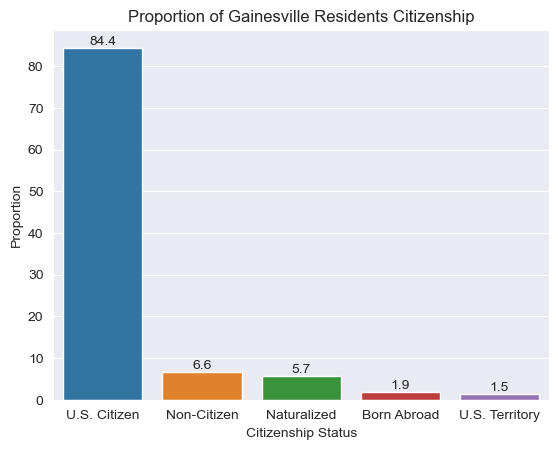

In [21]:
# adding in text labels above each bar
# https://datavizpyr.com/annotate-barplot-with-bar_label-in-matplotlib/
sns.set_style("darkgrid")
splot = sns.barplot(x='status',
            y= 'percent',
            data=cit)
plt.xlabel("Citizenship Status")
plt.ylabel("Proportion")
plt.title('Proportion of Gainesville Residents Citizenship')
plt.bar_label(splot.containers[0])
plt.show()

Analyzing a single numeric variable using the Gainesville PUMS data. (Wages and Salary Income (WAGP))

In [22]:
wagp = pd.DataFrame(gville['WAGP'])
wagp

,WAGP
3,500.0
9,0.0
31,450.0
78,2500.0
119,0.0
...,...
204081,23000.0
204341,17000.0
204505,2000.0
205258,0.0


In [24]:
wagp.shape

(1448, 1)

In [25]:
wagp[["WAGP"]].describe()

,WAGP
count,1303.000000
mean,21197.275518
std,41897.993078
min,0.000000
25%,0.000000
50%,5000.000000
75%,31100.000000
max,466000.000000


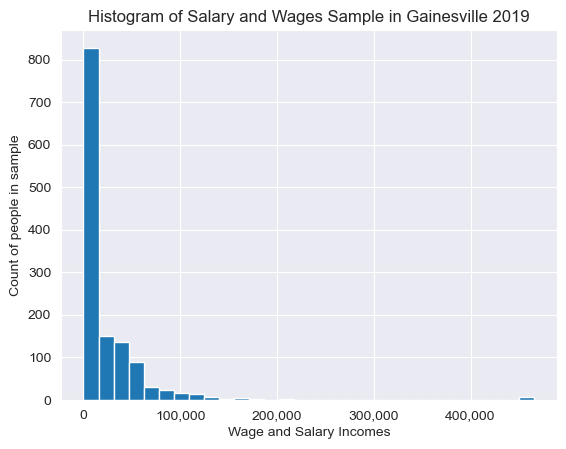

In [28]:
# this section of code illustrates building a histogram in matplotlib
plt.hist(wagp['WAGP'], bins=30)
plt.xlabel("Wage and Salary Incomes")
plt.ylabel("Count of people in sample")
plt.title('Histogram of Salary and Wages Sample in Gainesville 2019')

# the following code incorporates commas into the values on the x axis
# https://queirozf.com/entries/matplotlib-examples-number-formatting-for-axes-labels
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

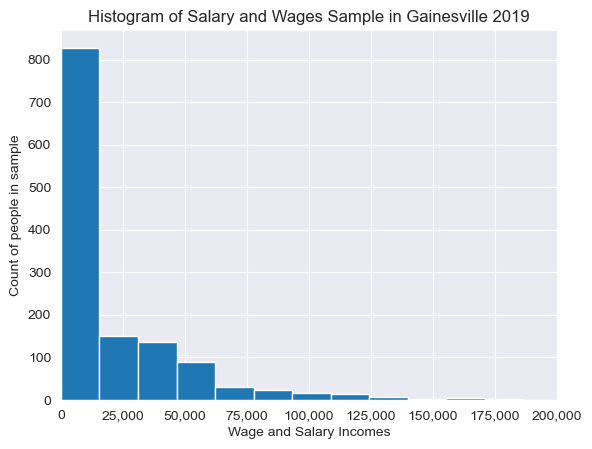

In [29]:
# limiting the x axis in matplotlib
# https://stackabuse.com/how-to-set-axis-range-xlim-ylim-in-matplotlib/
plt.hist(wagp['WAGP'], bins=30)
plt.xlim([0, 200000])#limiting the x axis to take out the outlier
plt.xlabel("Wage and Salary Incomes")
plt.ylabel("Count of people in sample")
plt.title('Histogram of Salary and Wages Sample in Gainesville 2019')

# incorporating commas on the x axis
# https://queirozf.com/entries/matplotlib-examples-number-formatting-for-axes-labels

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

Text(0.5, 1.0, 'Basic Boxplot')

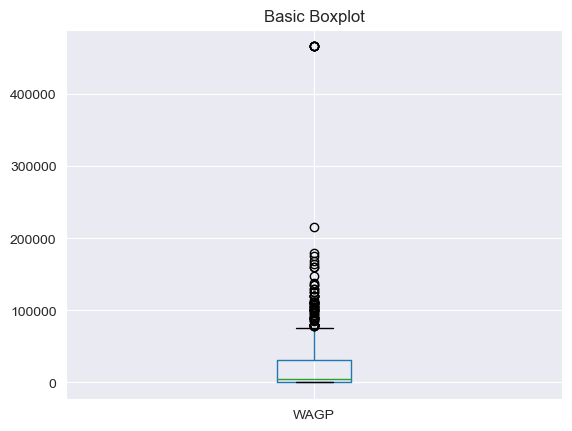

In [30]:
# https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
plot1 = wagp.boxplot(['WAGP'])
plot1.set_title('Basic Boxplot')


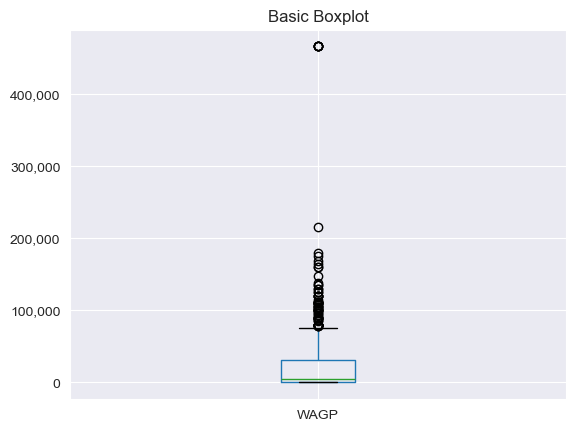

In [31]:
plot1 = wagp.boxplot(['WAGP'])
plot1.set_title('Basic Boxplot')
# https://stackoverflow.com/questions/25973581/how-to-format-axis-number-format-to-thousands-with-a-comma
plot1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

[Text(0.0, 0, '0'),
 Text(25000.0, 0, '25,000'),
 Text(50000.0, 0, '50,000'),
 Text(75000.0, 0, '75,000'),
 Text(100000.0, 0, '100,000'),
 Text(125000.0, 0, '125,000'),
 Text(150000.0, 0, '150,000'),
 Text(175000.0, 0, '175,000'),
 Text(200000.0, 0, '200,000')]

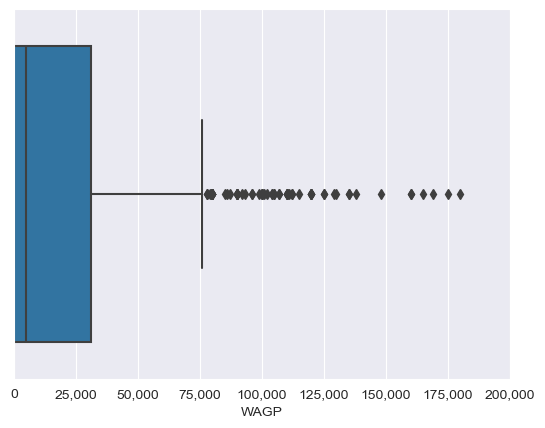

In [32]:
warnings.simplefilter('ignore') # turn off warnings
sns.boxplot(x=wagp['WAGP'])
plt.xlim([0, 200000])
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


The numeric in this example is wages (WAGP). The categorical is class of worker (COW).

In [33]:
# https://sparkbyexamples.com/pandas/pandas-create-new-dataframe-by-selecting-specific-columns/
# Using DataFrame.copy() create new DaraFrame.

df2 = gville[['WAGP', 'COW']].copy()
df2.head()

,WAGP,COW
3,500.0,4.0
9,0.0,1.0
31,450.0,1.0
78,2500.0,1.0
119,0.0,1.0


In [34]:
df2.shape

(1448, 2)

<Axes: xlabel='COW', ylabel='WAGP'>

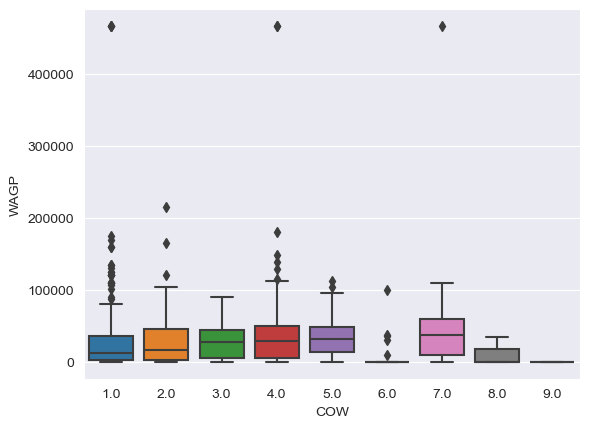

In [35]:
sns.boxplot( x=df2["COW"], y=df2["WAGP"] )

(0.0, 200000.0)

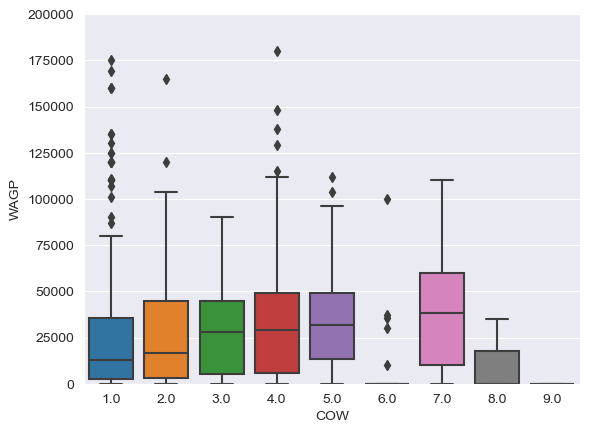

In [36]:
sns.boxplot( x=df2["COW"], y=df2["WAGP"] )
# limit the y axis for the super long outliers
plt.ylim([0, 200000])

[Text(0, 0.0, '0'),
 Text(0, 25000.0, '25,000'),
 Text(0, 50000.0, '50,000'),
 Text(0, 75000.0, '75,000'),
 Text(0, 100000.0, '100,000'),
 Text(0, 125000.0, '125,000'),
 Text(0, 150000.0, '150,000'),
 Text(0, 175000.0, '175,000'),
 Text(0, 200000.0, '200,000')]

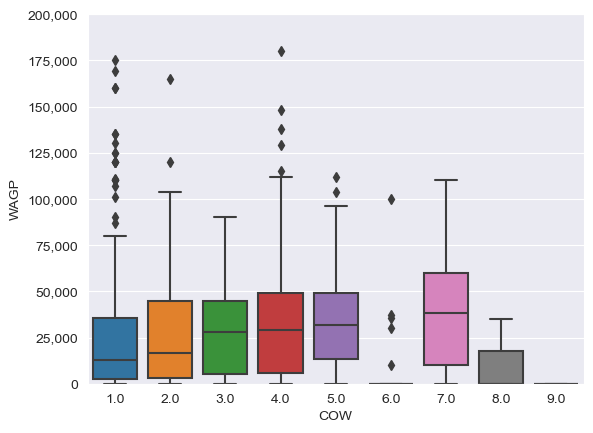

In [37]:
sns.boxplot( x=df2["COW"], y=df2["WAGP"] )
# limit the y axis for the super long outliers
plt.ylim([0, 200000])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

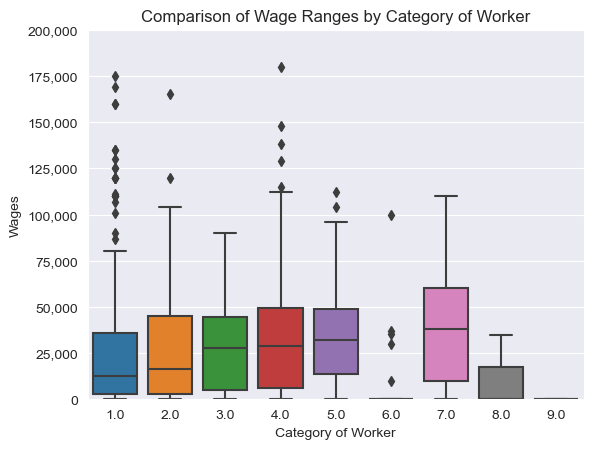

In [38]:
sns.boxplot( x=df2["COW"], y=df2["WAGP"] )
# add plot labels
plt.xlabel('Category of Worker')
plt.ylabel('Wages')
plt.title('Comparison of Wage Ranges by Category of Worker')

plt.ylim([0, 200000])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

Converting the COW column to a category vice a number.

In [39]:
# https://www.datasciencemadesimple.com/convert-column-to-categorical-pandas-python-2/
df2['COW'] = pd.Categorical(df2.COW)
df2.dtypes

WAGP     float64
COW     category
dtype: object

In [40]:
# count the number of observations by category in the COW variable
df2["COW"].value_counts()

COW
1.0    520
4.0    182
2.0     82
3.0     55
6.0     49
7.0     37
5.0     29
9.0      5
8.0      3
Name: count, dtype: int64

In [41]:
# https://pbpython.com/categorical-encoding.html
CowCat = {"COW":     {1: "Private", 2 : "NonProfit" , 3:"Local Gov", 4: "State Gov", 5: "Fed Gov", 6: "Self Emp",
                     7: "Self Emp Inc", 8:"Work, No Pay", 9:"Unemployed"}}
df2 = df2.replace(CowCat)
df2.head()

,WAGP,COW
3,500.0,State Gov
9,0.0,Private
31,450.0,Private
78,2500.0,Private
119,0.0,Private


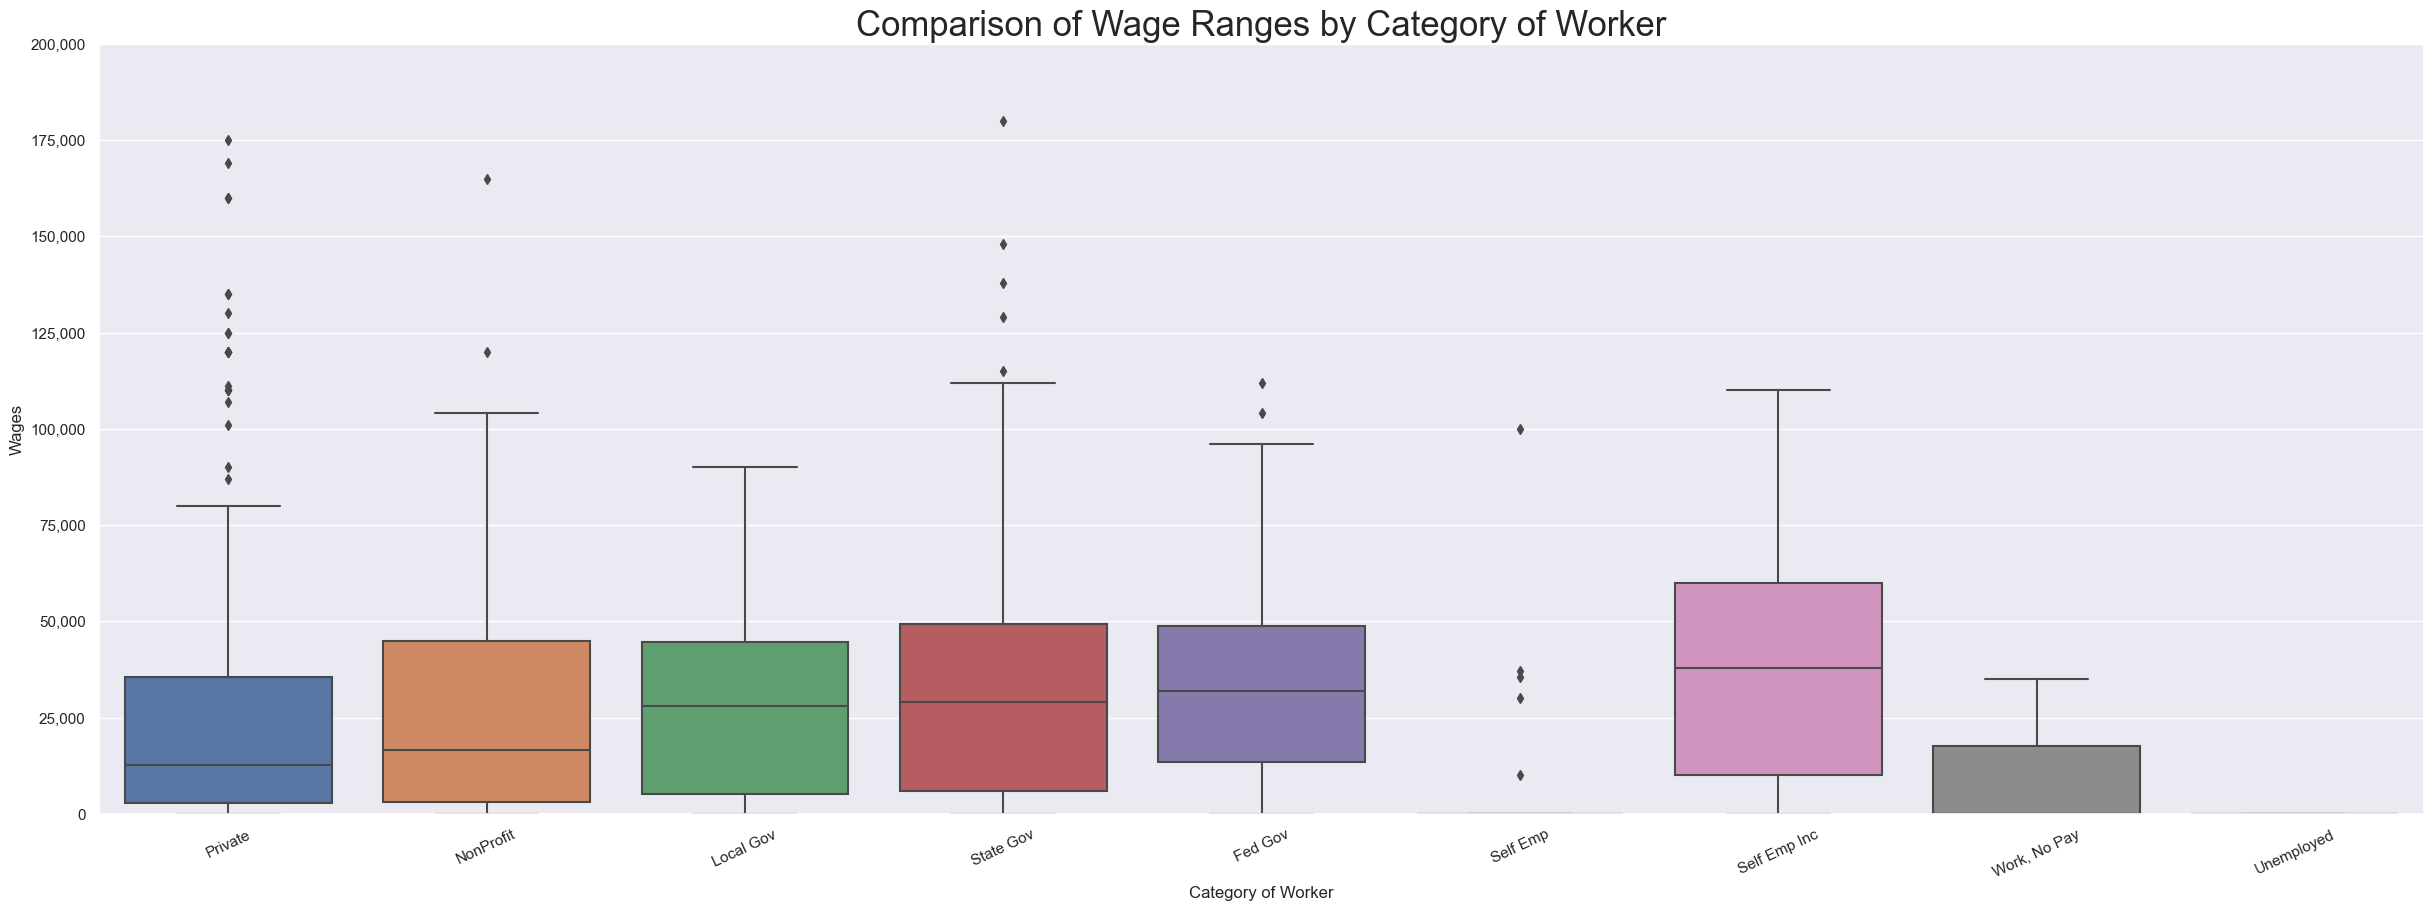

In [51]:
sns.boxplot( x=df2["COW"], y=df2["WAGP"] )

plt.xlabel('Category of Worker')
plt.ylabel('Wages')
plt.title('Comparison of Wage Ranges by Category of Worker', fontsize=25)

plt.xticks(rotation=25)

plt.ylim([0, 200000])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
sns.set(rc = {'figure.figsize':(30,10)})
plt.show()